<a href="https://colab.research.google.com/github/rroszczyk/1DI2243/blob/main/porownanie_algorytmow_tkanka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
!pip install  opencv-python==3.4.2.17
!pip install  opencv-contrib-python==3.4.2.17
import cv2 

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import requests

def pobierzPlik(url, nazwaPliku):
    req = requests.get(url, stream=True)
    with open(nazwaPliku, 'wb') as uchwytPliku:
        for chunk in req.iter_content():
            uchwytPliku.write(chunk)

nazwyPlikow = ['img.png']
for nazwa in nazwyPlikow:
  pobierzPlik("https://github.com/rroszczyk/1DI2243/raw/main/data/"+nazwa, nazwa)

In [18]:
img = cv2.imread('img.png')  
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
(kps, descs) = sift.detectAndCompute(img, None)
print("SIFT # kps: {}, descriptors: {}".format(len(kps), descs.shape))
siftKP = cv2.drawKeypoints(img, kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img = cv2.imread('img.png')  
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
brisk = cv2.BRISK_create()
(kps, descs) = brisk.detectAndCompute(img, None)
print("BRISK # kps: {}, descriptors: {}".format(len(kps), descs.shape))
briskKP = cv2.drawKeypoints(img, kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img = cv2.imread('img.png')  
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
surf = cv2.xfeatures2d.SURF_create()
(kps, descs) = surf.detectAndCompute(img, None)
print("SURF # kps: {}, descriptors: {}".format(len(kps), descs.shape))
surfKP = cv2.drawKeypoints(img, kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img = cv2.imread('img.png')  
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kaze = cv2.KAZE_create()
(kps, descs) = kaze.detectAndCompute(img, None)
print("KAZE # kps: {}, descriptors: {}".format(len(kps), descs.shape))
kazeKP = cv2.drawKeypoints(img, kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img = cv2.imread('img.png')  
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
akaze = cv2.AKAZE_create()
(kps, descs) = akaze.detectAndCompute(img, None)
print("AKAZE # kps: {}, descriptors: {}".format(len(kps), descs.shape))
akazeKP = cv2.drawKeypoints(img, kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img = cv2.imread('img.png')  
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fast = cv2.FastFeatureDetector_create()
kps = fast.detect(img,None)
print("FAST # kps: {}".format(len(kps)))
fastKP = cv2.drawKeypoints(img, kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


SIFT # kps: 10348, descriptors: (10348, 128)
BRISK # kps: 17170, descriptors: (17170, 64)
SURF # kps: 6075, descriptors: (6075, 64)
KAZE # kps: 9470, descriptors: (9470, 64)
AKAZE # kps: 6867, descriptors: (6867, 61)
FAST # kps: 24641


(-0.5, 749.5, 749.5, -0.5)

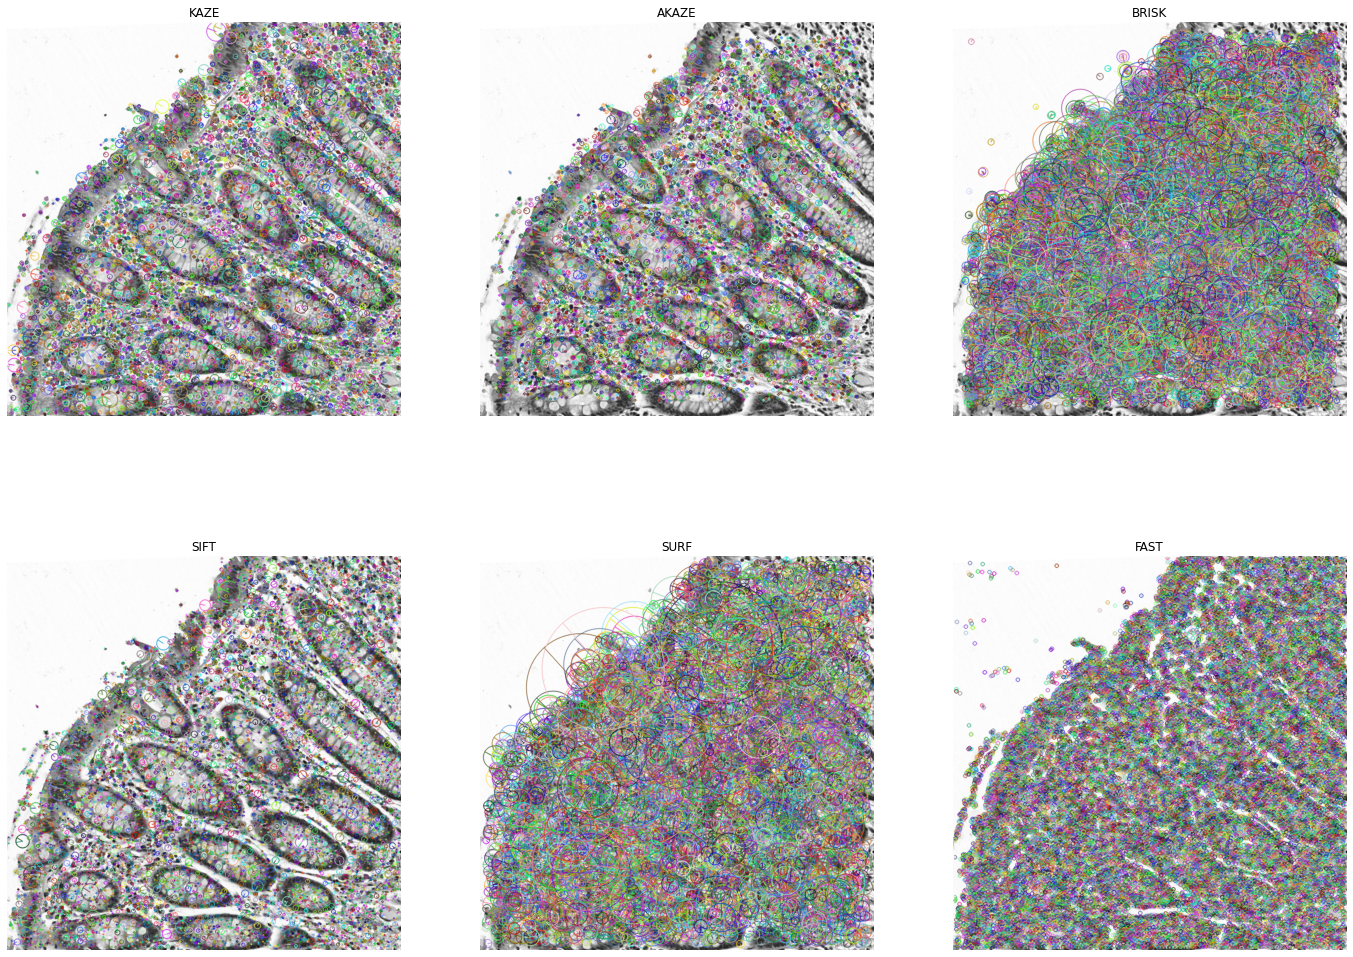

In [33]:
fig, ax = plt.subplots(2, 3, figsize=(24, 18))

ax[0, 0] = plt.subplot(2, 3, 1)
ax[0, 1] = plt.subplot(2, 3, 2)
ax[0, 2] = plt.subplot(2, 3, 3)
ax[1, 0] = plt.subplot(2, 3, 4)
ax[1, 1] = plt.subplot(2, 3, 5)
ax[1, 2] = plt.subplot(2, 3, 6)

ax[0, 0].imshow(kazeKP)
ax[0, 0].set_title('KAZE')
ax[0, 0].axis('off')

ax[0, 1].imshow(akazeKP)
ax[0, 1].set_title('AKAZE')
ax[0, 1].axis('off')

ax[0, 2].imshow(briskKP)
ax[0, 2].set_title('BRISK')
ax[0, 2].axis('off')

ax[1, 0].imshow(siftKP)
ax[1, 0].set_title('SIFT')
ax[1, 0].axis('off')

ax[1, 1].imshow(surfKP)
ax[1, 1].set_title('SURF')
ax[1, 1].axis('off')

ax[1, 2].imshow(fastKP)
ax[1, 2].set_title('FAST')
ax[1, 2].axis('off')

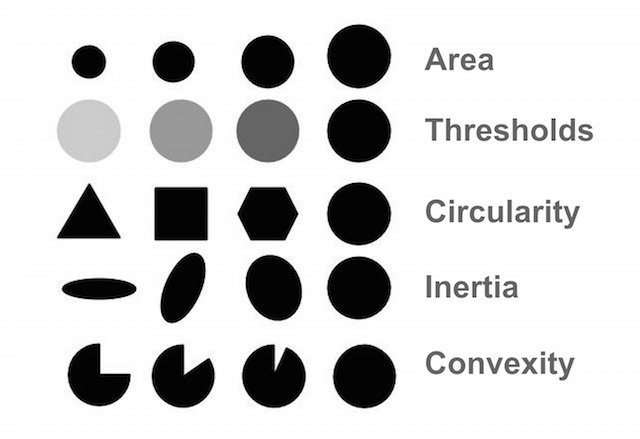

BLOBS # kps: 466
BLOBS # kps: 396


(-0.5, 749.5, 749.5, -0.5)

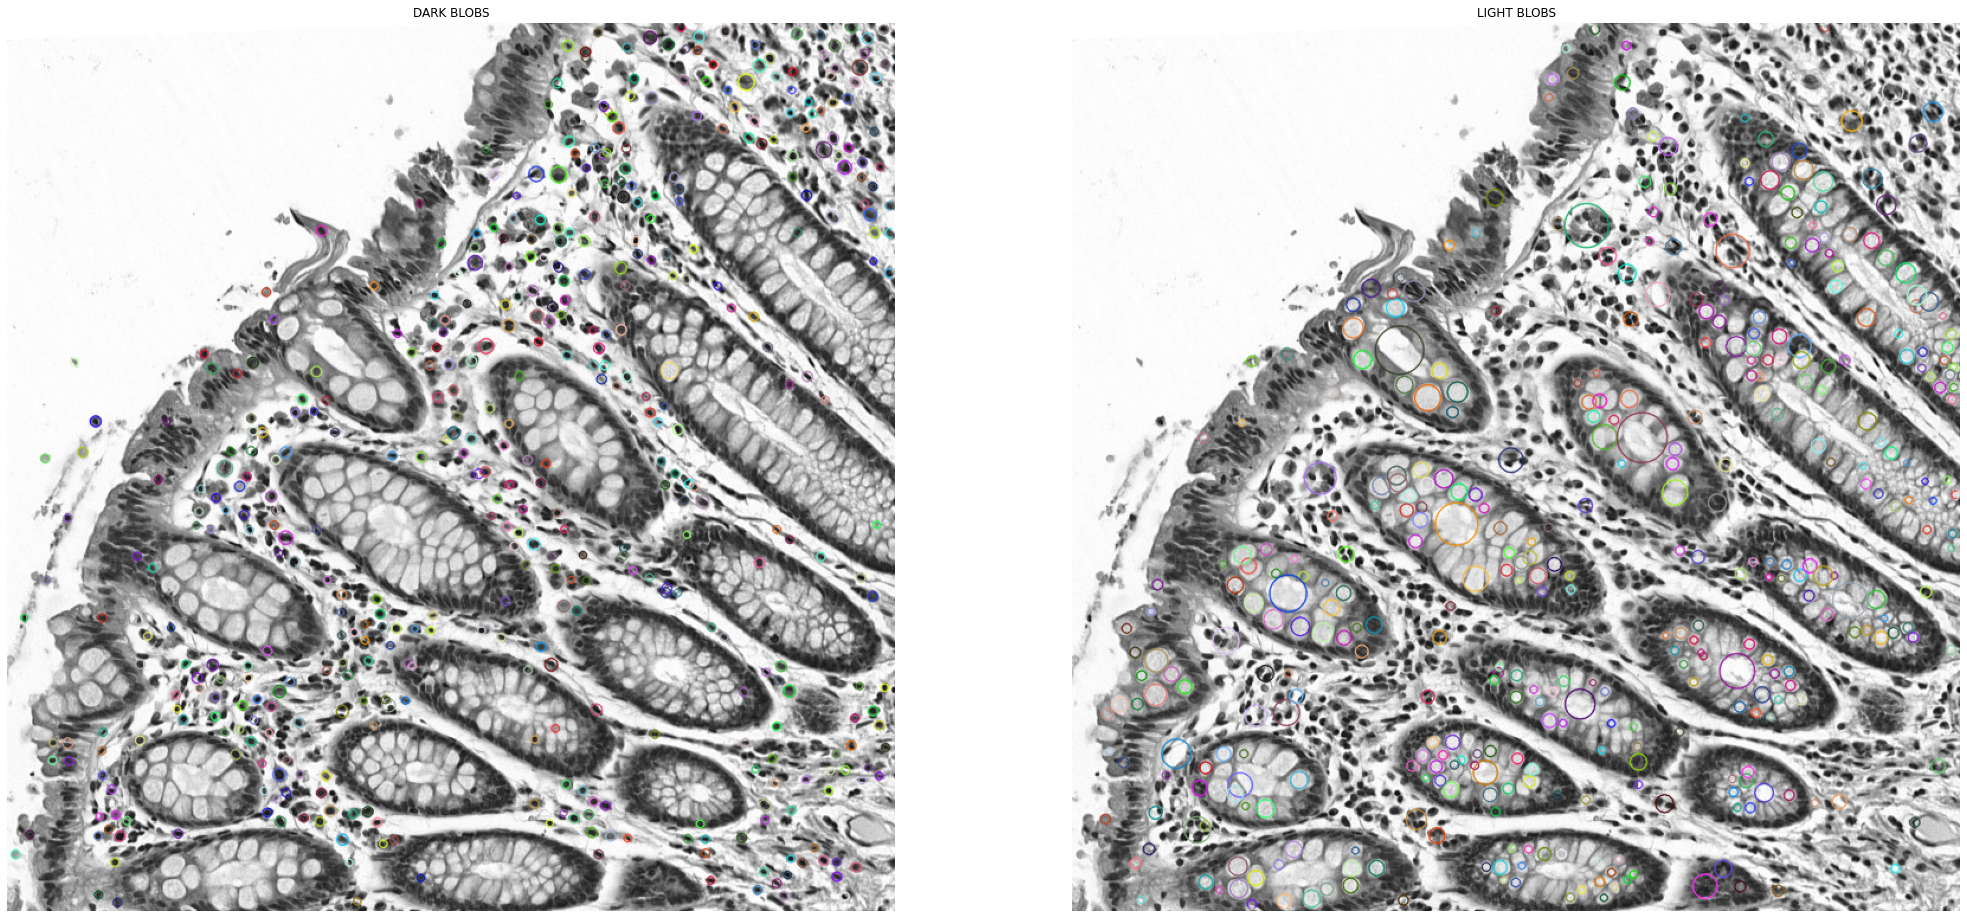

In [83]:
img = cv2.imread('img.png')  
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

detector = cv2.SimpleBlobDetector_create()
kps = detector.detect(img)

print("BLOBS # kps: {}".format(len(kps)))
blob1KP = cv2.drawKeypoints(img, kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


params = cv2.SimpleBlobDetector_Params()
# Change thresholds
#params.minThreshold = 300;
#params.maxThreshold = 2500;
# Filter by Area.
params.filterByArea = True
params.minArea = 20
# Filter by okrągłość
params.filterByCircularity = True
params.minCircularity = 0.2
# Filter by Color - kolor - 255 lub 0
params.filterByColor = True
params.blobColor = 255
# Filter by Convexity - wypukłość
params.filterByConvexity = True
params.minConvexity = 0.37
# Filter by Inertia - bezwładność
params.filterByInertia = True
params.minInertiaRatio = 0.1

detector = cv2.SimpleBlobDetector_create(params)
kps = detector.detect(img)

print("BLOBS # kps: {}".format(len(kps)))
blob2KP = cv2.drawKeypoints(img, kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, axes = plt.subplots(ncols=2, figsize=(35, 35))

ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(blob1KP)
ax[0].set_title('DARK BLOBS')
ax[0].axis('off')

ax[1].imshow(blob2KP)
ax[1].set_title('LIGHT BLOBS')
ax[1].axis('off')